# Week Five Homework

### While AI-assisted tools such as ChatGPT will be used in the completion of this assignment, the use of published documentation online will be used in the assistance of writing code.
The documentation that will be used is as follows:<br>
    - [docs.python.org](https://docs.python.org/3/)<br>
    - [pandas.pydata.org](https://pandas.pydata.org/docs/user_guide/index.html)<br>
    - [plotly.com](https://plotly.com/python-api-reference/generated/plotly.graph_objects.html#plotly.graph_objects.Figure)<br>

The ChatGPT chat log:<br>
   - [Click Here](https://chatgpt.com/share/672d41f3-37ac-800d-a4e8-d9d97ee9fc8c)

## Homework Week Of Oct. 21

### 1. Explain the theoretical Simple Linear Regression model in your own words by describing its components (of predictor and outcome variables, slope and intercept coefficients, and an error term) and how they combine to form a sample from normal distribution; then, create python code explicitly demonstrating your explanation using numpy and scipy.stats

The goal of simple linear regression is to determine the relationship between one predictor variable and another outcome variable. We create an equation with an intercept and a slope that indicates how much one variable changes when the other rises or falls in order to presume that they have a simple straight-line connection. The line that shows the value of the result if the predictor were zero crosses the y-axis at the intercept. The slope indicates the line's steepness and the impact of predictor adjustments. We include a "error term" to account for random variations brought on by additional variables not covered by the model because this line isn't a perfect match for every data point. All in all, this produces a model that implies that data points have a normal distribution around this line, with the majority of the data points being around the line but varying somewhat. This gives us a realistic image.All in all, this produces a model that implies that data points have a normal distribution around this line, with the majority of the data points being around the line but varying somewhat. This gives us a realistic image.

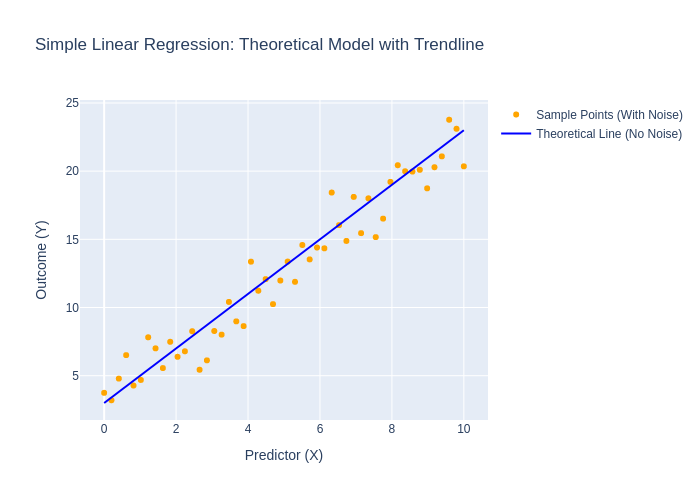

In [48]:
import numpy as np
import pandas as pd
import plotly.graph_objects as go
from scipy.stats import norm

# Set the random seed for reproducibility
np.random.seed(42)

# Define the theoretical model parameters
beta_0 = 3  # Intercept
beta_1 = 2  # Slope
sigma = 1.5  # Standard deviation of the error term

# Generate predictor (X) values
X = np.linspace(0, 10, 50)  # 50 points from 0 to 10

# Generate error term epsilon from a normal distribution with mean 0 and standard deviation sigma
epsilon = norm.rvs(loc=0, scale=sigma, size=X.shape[0])

# Calculate the outcome variable Y based on the theoretical model
Y = beta_0 + beta_1 * X + epsilon

# Calculate the theoretical line without noise
Y_theoretical = beta_0 + beta_1 * X

# Create a DataFrame for easier plotting with Plotly
df = pd.DataFrame({
    "X": X,
    "Y": Y,
    "Y_theoretical": Y_theoretical
})

fig = go.Figure()

# Scatter plot of the sample points with noise
fig.add_trace(go.Scatter(x=df['X'], y=df['Y'], mode='markers', name='Sample Points (With Noise)', marker=dict(color='orange')))

# Add the theoretical regression line without noise
fig.add_trace(go.Scatter(x=df['X'], y=df['Y_theoretical'], mode='lines', name='Theoretical Line (No Noise)', line=dict(color='blue')))

# Update layout for clarity
fig.update_layout(
    title="Simple Linear Regression: Theoretical Model with Trendline",
    xaxis_title="Predictor (X)",
    yaxis_title="Outcome (Y)"
)

# Show the plot
fig.show(renderer='png')

### 2. Use a dataset simulated from your theoretical Simple Linear Regression model to demonstrate how to create and visualize a fitted Simple Linear Regression model using pandas and import statsmodels.formula.api as smf

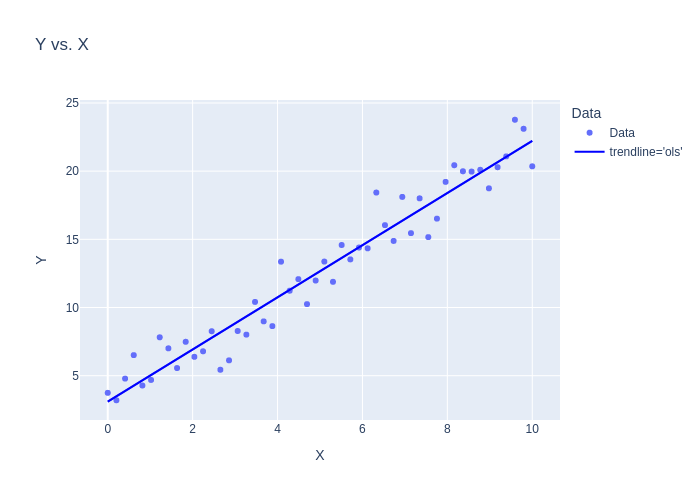

In [6]:
import statsmodels.formula.api as smf  # This library provides a formula API for specifying statistical models
import plotly.express as px  # Plotly Express is a library for simple and interactive visualizations

# Step 1: Specify the model and fit it to the data
model_data_specification = smf.ols("Y ~ X", data=df)  # Specify an Ordinary Least Squares (OLS) model, with Y as the outcome and X as the predictor
fitted_model = model_data_specification.fit()  # Fit the model to estimate the coefficients (slope and intercept)

# Step 2: Get model summary and key values
fitted_model.summary()  # Provides a detailed summary of the model fit, including coefficients, R-squared, and statistical significance tests
fitted_model.summary().tables[1]  # Displays only the table with coefficients (intercept, slope) and their statistical details
fitted_model.params  # Outputs the estimated model parameters: intercept and slope
fitted_model.params.values  # Returns the parameters as an array of values (useful for further calculations)
fitted_model.rsquared  # Returns the R-squared value, which represents the proportion of the variance in Y explained by X

# Step 3: Plot the data and fitted regression line with Plotly Express
df['Data'] = 'Data'  # Add a column to ensure data points appear in the legend
fig = px.scatter(df, x='X', y='Y', color='Data', trendline='ols', title='Y vs. X')  # Scatter plot with a trendline showing the fitted model

# Alternatively, add a fitted regression line manually using the fitted values
fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,  # Plot the fitted line
                line=dict(color='blue'), name="trendline='ols'")

fig.show(renderer="png")  # Display the plot (using "png" renderer for GitHub and MarkUs compatibility)


### 3. Add the line from Question 1 on the figure of Question 2 and explain the difference between the nature of the two lines in your own words

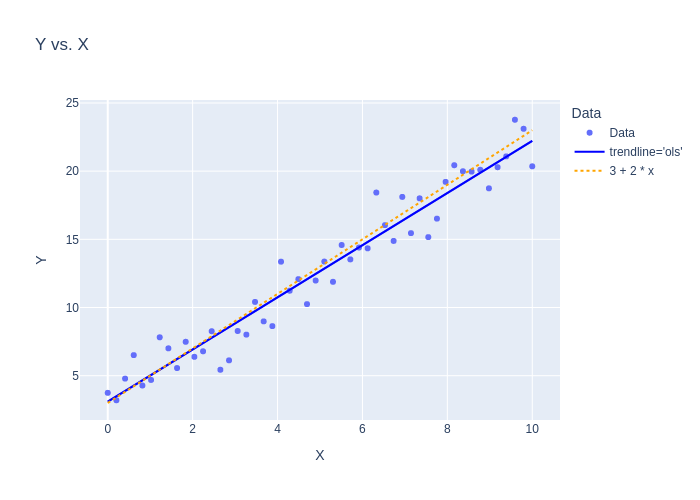

In [49]:
import statsmodels.formula.api as smf  # This library provides a formula API for specifying statistical models
import plotly.express as px  # Plotly Express is a library for simple and interactive visualizations

# Step 1: Specify the model and fit it to the data
model_data_specification = smf.ols("Y ~ X", data=df)  # Specify an Ordinary Least Squares (OLS) model, with Y as the outcome and X as the predictor
fitted_model = model_data_specification.fit()  # Fit the model to estimate the coefficients (slope and intercept)

# Step 2: Get model summary and key values
fitted_model.summary()  # Provides a detailed summary of the model fit, including coefficients, R-squared, and statistical significance tests
fitted_model.summary().tables[1]  # Displays only the table with coefficients (intercept, slope) and their statistical details
fitted_model.params  # Outputs the estimated model parameters: intercept and slope
fitted_model.params.values  # Returns the parameters as an array of values (useful for further calculations)
fitted_model.rsquared  # Returns the R-squared value, which represents the proportion of the variance in Y explained by X

# Step 3: Plot the data and fitted regression line with Plotly Express
df['Data'] = 'Data'  # Add a column to ensure data points appear in the legend
fig = px.scatter(df, x='X', y='Y', color='Data', trendline='ols', title='Y vs. X')  # Scatter plot with a trendline showing the fitted model

# Alternatively, add a fitted regression line manually using the fitted values
fig.add_scatter(x=df['X'], y=fitted_model.fittedvalues,  # Plot the fitted line
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['X'].min(), df['X'].max()])
# beta0 and beta1 are assumed to be defined
y_line = beta_0 + beta_1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta_0)+' + '+str(beta_1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Show the plot
fig.show(renderer='png')

In order to produce the initial trendline, the actual data points are analyzed using a procedure that determines the best-fitting straight line across them, ensuring sure the line is as near to each point as feasible. You get a line that shows the true relationship between the variables once it adjusts to the data. In contrast, the second trendline is created using a predetermined formula that has fixed values for the slope and intercept. This represents what you would anticipate the line to be and is not affected by the data. It's more akin to a theoretical line that might not precisely correspond with the data.

### 4. Explain how fitted_model.fittedvalues are derived on the basis of fitted_model.summary().tables[1] (or more specifically fitted_model.params or fitted_model.params.values)

The regression model's predicted values for Y (the result) are simply the fitted values (`fitted_model.fittedvalues`). The estimated slope and intercept (the coefficients) that the model determines after fitting the data are used to make these predictions. The intercept indicates where the line begins on the Y-axis, and the slope indicates how much Y changes for every unit change in X. After determining these values, the model determines what Y should be for each given X using the formula Y=β0+β1⋅XY=β0​+β1​⋅X. `Fitted_model.fittedvalues` displays these predicted values, which are the "best guess" for Y based on the linear connection the model has found.

### 5. Explain concisely in your own words what line is chosen for the fitted model based on observed data using the "ordinary least squares" method (as is done by trendline='ols' and smf.ols(...).fit()) and why it requires "squares"

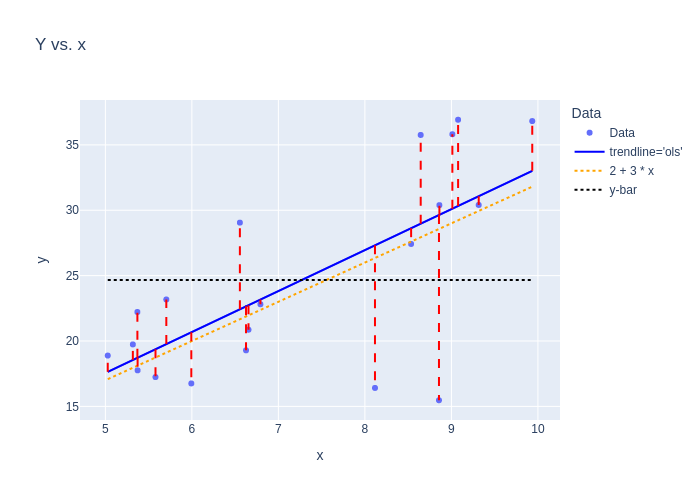

In [50]:
import scipy.stats as stats
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

n,x_min,x_range,beta0,beta1,sigma = 20,5,5,2,3,5
x = stats.uniform(x_min, x_range).rvs(size=n)
errors = stats.norm(loc=0, scale=sigma).rvs(size=n)
Y = beta0 + beta1 * x + errors

df = pd.DataFrame({'x': x, 'y': Y})
model_data_specification = smf.ols("Y~x", data=df) 
fitted_model = model_data_specification.fit() 

df['Data'] = 'Data' # hack to add data to legend 
fig = px.scatter(df, x='x',  y='y', color='Data', 
                 trendline='ols', title='Y vs. x')

# This is what `trendline='ols'` is
fig.add_scatter(x=df['x'], y=fitted_model.fittedvalues,
                line=dict(color='blue'), name="trendline='ols'")

x_range = np.array([df['x'].min(), df['x'].max()])
y_line = beta0 + beta1 * x_range
fig.add_scatter(x=x_range, y=y_line, mode='lines',
                name=str(beta0)+' + '+str(beta1)+' * x', 
                line=dict(dash='dot', color='orange'))

# Add vertical lines for residuals
for i in range(len(df)):
    fig.add_scatter(x=[df['x'][i], df['x'][i]],
                    y=[fitted_model.fittedvalues[i], df['y'][i]],
                    mode='lines',
                    line=dict(color='red', dash='dash'),
                    showlegend=False)
    
# Add horizontal line at y-bar
fig.add_scatter(x=x_range, y=[df['y'].mean()]*2, mode='lines',
                line=dict(color='black', dash='dot'), name='y-bar')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

When fitting a regression line, the Ordinary Least Squares (OLS) approach minimizes the sum of the squared residuals, or the discrepancies between the line's projected values and the actual data points. The two primary functions of squaring the residuals are to remove negative values, guaranteeing that all residuals add positively to the sum regardless of whether the data point is above or below the line, and to give greater weight to larger errors, increasing the model's sensitivity to outliers and larger discrepancies. By lessening the effect of greater mistakes, OLS aims to identify the line that minimizes these squared differences and offers the greatest fit to the data. In order to find the best-fitting line, the approach, which is why it is termed "Ordinary Least Squares," minimizes the squared disparities between the observed and predicted values.In order to find the best-fitting line, the approach, which is why it is termed "Ordinary Least Squares," minimizes the squared disparities between the observed and predicted values.

### 6. Explain why the first expression below can be interpreted as "the proportion of variation in (outcome) Y explained by the model (i.e. fitted_model.fittedvalues)"; and therefore, why fitted_model.rsquared can be interpreted as a measure of the accuracy of the model; and, therefore what the two np.corrcoef(...)[0,1]**2 expressions capture in the context of Simple Linear Regression models.

The coefficient of determination ($R^2$), which quantifies the percentage of the variation in the outcome variable Y that can be accounted for by the regression model, is computed using the given equation. It accomplishes this by contrasting the total variance in Y (the variation around the mean of Y) with the sum of squared residuals (the variation in Y that the model cannot account for). The fraction of the variance in Y that can be described by the model is calculated by subtracting the result from 1, which shows how well the model predicts the observed data. More variability in Y is explained by the model when the $R^2$ is greater.

### 7. Indicate a couple of the assumptions of the Simple Linear Regression model specification that do not seem compatible with the example data below

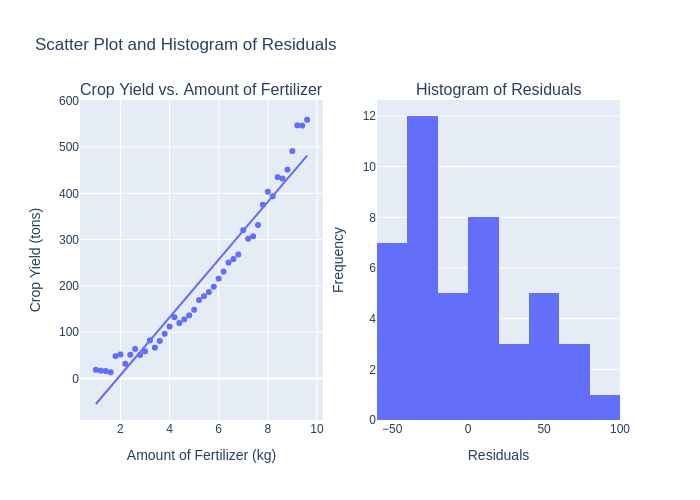

In [51]:
import pandas as pd
from scipy import stats
import plotly.express as px
from plotly.subplots import make_subplots

# This data shows the relationship between the amount of fertilizer used and crop yield
data = {'Amount of Fertilizer (kg) (x)': [1, 1.2, 1.4, 1.6, 1.8, 2, 2.2, 2.4, 2.6, 
                                          2.8, 3, 3.2, 3.4, 3.6, 3.8, 4, 4.2, 4.4, 
                                          4.6, 4.8, 5, 5.2, 5.4, 5.6, 5.8, 6, 6.2, 
                                          6.4, 6.6, 6.8, 7, 7.2, 7.4, 7.6, 7.8, 8, 
                                          8.2, 8.4, 8.6, 8.8,9, 9.2, 9.4, 9.6],
        'Crop Yield (tons) (Y)': [18.7, 16.9, 16.1, 13.4, 48.4, 51.9, 31.8, 51.3, 
                                  63.9, 50.6, 58.7, 82.4, 66.7, 81.2, 96.5, 112.2, 
                                  132.5, 119.8, 127.7, 136.3, 148.5, 169.4, 177.9, 
                                  186.7, 198.1, 215.7, 230.7, 250.4, 258. , 267.8, 
                                  320.4, 302. , 307.2, 331.5, 375.3, 403.4, 393.5,
                                  434.9, 431.9, 451.1, 491.2, 546.8, 546.4, 558.9]}
df = pd.DataFrame(data)
fig1 = px.scatter(df, x='Amount of Fertilizer (kg) (x)', y='Crop Yield (tons) (Y)',
                  trendline='ols', title='Crop Yield vs. Amount of Fertilizer')

# Perform linear regression using scipy.stats
slope, intercept, r_value, p_value, std_err = \
    stats.linregress(df['Amount of Fertilizer (kg) (x)'], df['Crop Yield (tons) (Y)'])
# Predict the values and calculate residuals
y_hat = intercept + slope * df['Amount of Fertilizer (kg) (x)']
residuals = df['Crop Yield (tons) (Y)'] - y_hat
df['Residuals'] = residuals
fig2 = px.histogram(df, x='Residuals', nbins=10, title='Histogram of Residuals',
                    labels={'Residuals': 'Residuals'})

fig = make_subplots(rows=1, cols=2,
                    subplot_titles=('Crop Yield vs. Amount of Fertilizer', 
                                    'Histogram of Residuals'))
for trace in fig1.data:
    fig.add_trace(trace, row=1, col=1)
for trace in fig2.data:
    fig.add_trace(trace, row=1, col=2)
fig.update_layout(title='Scatter Plot and Histogram of Residuals',
    xaxis_title='Amount of Fertilizer (kg)', yaxis_title='Crop Yield (tons)',
    xaxis2_title='Residuals', yaxis2_title='Frequency', showlegend=False)

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

One apparent issue with the model above is that the line of best fit is not best represented by simple linear regression, but rather perhaps a polynomial or exponential curve instead which would better describe the graph. 

## Homework Week of Nov. 4

### 8. Specify a null hypothesis of "no linear association (on average)" in terms of the relevant parameter of the Simple Linear Regression model, and use the code below to characterize the evidence in the data relative to the null hypothesis and interpret your subsequent beliefs regarding the Old Faithful Geyser dataset.

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

In [20]:
import seaborn as sns
import statsmodels.formula.api as smf

# The "Classic" Old Faithful Geyser dataset
old_faithful = sns.load_dataset('geyser')

linear_for_specification = 'duration ~ waiting'
model = smf.ols(linear_for_specification, data=old_faithful)
fitted_model = model.fit()
fitted_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               duration   R-squared:                       0.811
Model:                            OLS   Adj. R-squared:                  0.811
Method:                 Least Squares   F-statistic:                     1162.
Date:                Thu, 07 Nov 2024   Prob (F-statistic):          8.13e-100
Time:                        21:01:59   Log-Likelihood:                -194.51
No. Observations:                 272   AIC:                             393.0
Df Residuals:                     270   BIC:                             400.2
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
==============================================================================
Omnibus:                        4.133   Durbin-Watson:                   2.561
Prob(Omnibus):                  0.127   Jarque-Bera (JB):                3.173
Skew:                          -0.138   Prob(JB):                        0.205
Kurtosis:                       2.548   Cond. No.                         384.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In this case, our null hypothesis can be that there is no linear correlation between the waiting times of the geyser and how long it erupts for. This means that for our null hypothesis, our slope ($β_1$) should have a value of zero. From the code, it gives a p-value so small that it shows up as 0.000 (as a rounding error), and thus there is very strong evidence against the null hypothesis and we can reject it on the grounds that our slope is greatly above zero.

### 9. As seen in the introductory figure above, if the delay of the geyser eruption since the previous geyser eruption exceeds approximately 63 minutes, there is a notable increase in the duration of the geyser eruption itself. In the figure below we therefore restrict the dataset to only short wait times. Within the context of only short wait times, is there evidence in the data for a relationship between duration and wait time in the same manner as in the full data set? Using the following code, characterize the evidence against the null hypothesis in the context of short wait times which are less than short_wait_limit values of 62, 64, 66.

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019


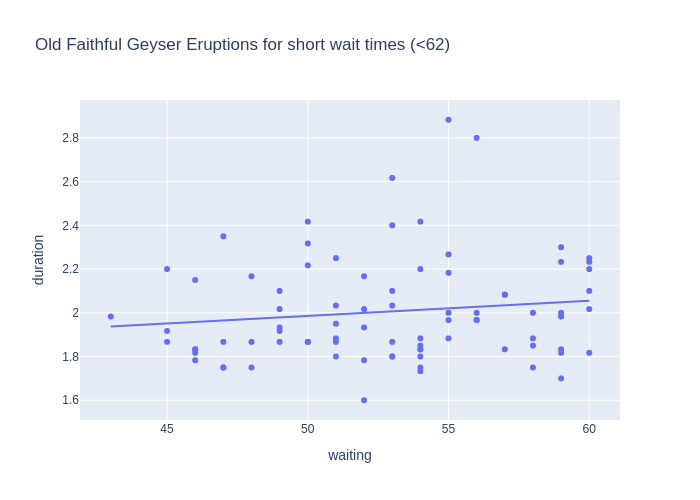

In [52]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 62 # 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.4140      0.288      4.915      0.000       0.842       1.986
waiting        0.0114      0.005      2.127      0.036       0.001       0.022


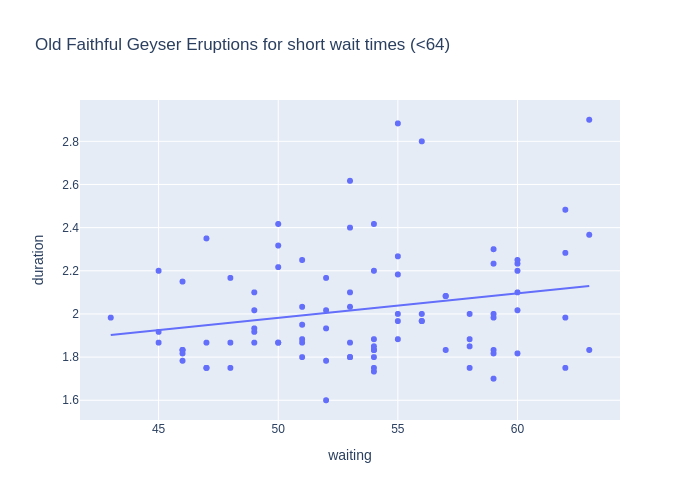

In [53]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 64 # 66 #
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8619      0.327      2.637      0.010       0.213       1.511
waiting        0.0221      0.006      3.704      0.000       0.010       0.034


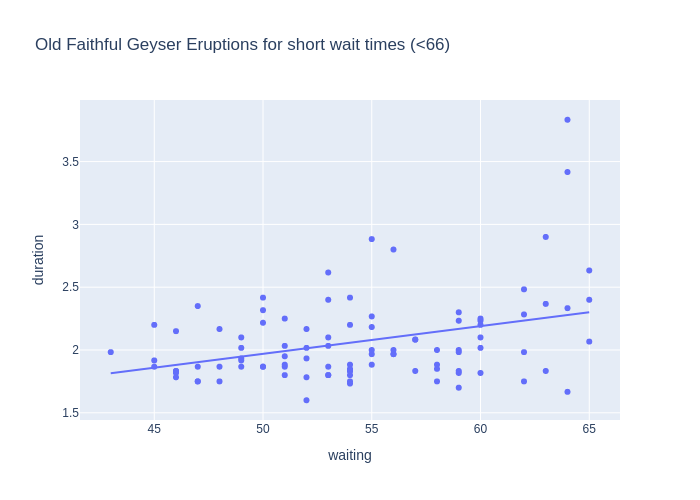

In [54]:
import plotly.express as px
import statsmodels.formula.api as smf


short_wait_limit = 66
short_wait = old_faithful.waiting < short_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[short_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (<"+str(short_wait_limit)+")", 
                 trendline='ols')

fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

In the lines of code above, we have swapped out the limit for each variation from 62 to 64 to 66. In the very first example, we recieve a p-value of around 0.2, which is safely within the first range of there being no evidence against the null hypothesis. This suggests that while there could be a linear association between wait times and eruption length, the evidence presented actually favours the null hypothesis and seems to suggest that there is seemingly no correlation. Then, in the limit at 64, we acheive a p-value of 0.036, which falls between 0.01 and 0.05 showing moderate evidence against the null hypothesis. This suggests that while there could be a linear association between the wait times and eruption length, the evidence is not conclusive of final results. Finally, when we switch the limit to a value of 66, the p-value falls to an extremely small value that is displayed as 0.000 due to rounding errors. This suggests extremely strong evidence against the null hypothesis, and allows it to be convincingly rejected showing that it is almost certain that there is a linear association between the waiting times and the eruption length.

### 10. Let's now consider just the (n=160) long wait times (as specified in the code below), and write code to do the following:
1. create fitted **Simple Linear Regression** models for **boostrap samples** and collect and visualize the **bootstrapped sampling distribution** of the **fitted slope coefficients** of the fitted models;<br><br>


2. **simulate** samples (of size `n=160`) from a **Simple Linear Regression** model that uses $\beta_0 = 1.65$, $\beta_1 = 0$, $\sigma = 0.37$ along with the values of `waiting` for $x$ to create **simuations** of $Y$ and use these collect and visualize the **sampling distribution** of the **fitted slope coefficient** under a **null hypothesis** assumption of "no linear association (on average)"; then,<br><br>


3. report if $0$ is contained within a 95\% **bootstrapped confidence interval**; and if the **simulated p-value** matches `smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1]`?<br><br>

                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.001       0.024


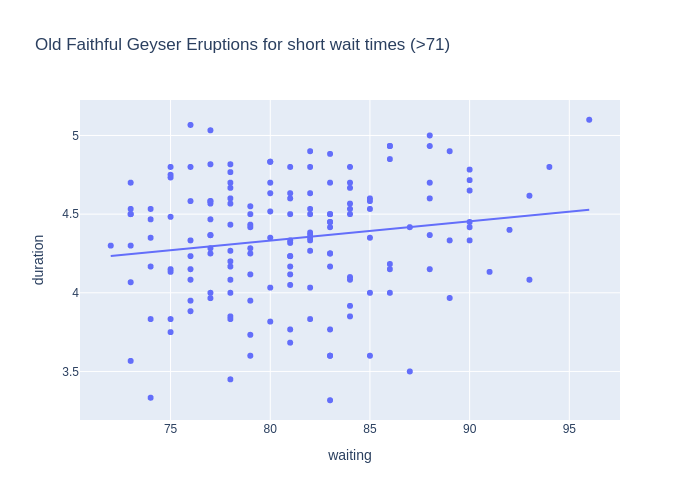

In [55]:
import plotly.express as px

long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit

print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

# Create a scatter plot with a linear regression trendline
fig = px.scatter(old_faithful[long_wait], x='waiting', y='duration', 
                 title="Old Faithful Geyser Eruptions for short wait times (>"+str(long_wait_limit)+")", 
                 trendline='ols')
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

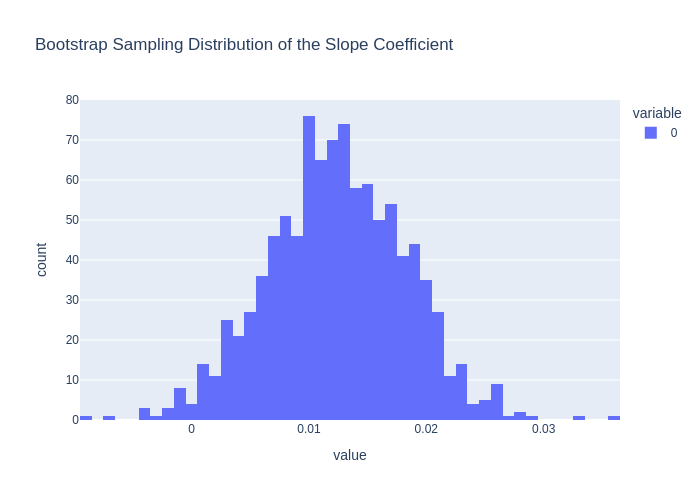

In [56]:
import numpy as np
import statsmodels.formula.api as smf
import plotly.express as px

# Define the number of bootstrap samples
n_bootstrap_samples = 1000

# Create an empty list to store the bootstrapped slope coefficients
bootstrap_slopes = []

# Bootstrap sampling and fitting the model
for _ in range(n_bootstrap_samples):
    # Create a bootstrap sample with replacement
    bootstrap_sample = old_faithful[long_wait].sample(frac=1, replace=True)
    
    # Fit the model to the bootstrap sample
    model = smf.ols('duration ~ waiting', data=bootstrap_sample)
    fitted_model = model.fit()
    
    # Store the slope coefficient (beta_1)
    bootstrap_slopes.append(fitted_model.params['waiting'])

# Convert the list of slopes to a numpy array
bootstrap_slopes = np.array(bootstrap_slopes)

# Visualize the bootstrapped sampling distribution of the slope coefficients
fig = px.histogram(bootstrap_slopes, nbins=50, title="Bootstrap Sampling Distribution of the Slope Coefficient")
fig.show(renderer='png')

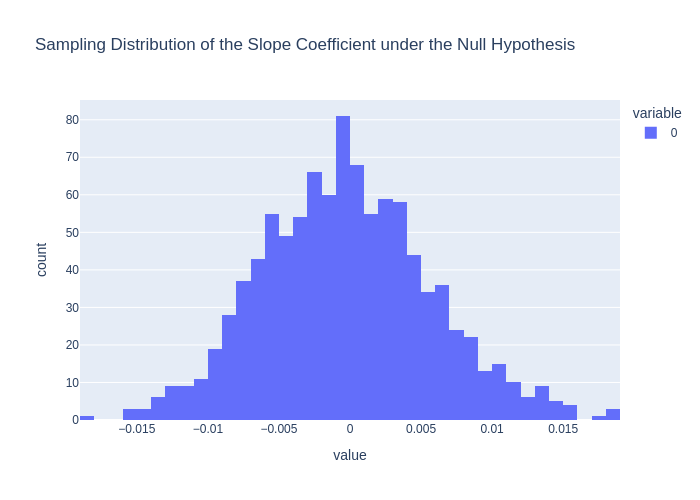

In [57]:
# Simulate data from a Simple Linear Regression Model under the null hypothesis
n = 160  # Sample size
n_simulations = 1000  # Number of simulations
beta_0 = 1.65  # Intercept
beta_1 = 0  # Slope under the null hypothesis
sigma = 0.37  # Standard deviation of the error term

# Create an empty list to store the simulated slope coefficients
simulated_slopes = []

# Generate X values (waiting times from the original dataset)
waiting_times = old_faithful[long_wait]['waiting'].values

# Simulate multiple datasets under the null hypothesis
for _ in range(n_simulations):
    # Simulate the error term (epsilon) from a normal distribution
    epsilon = np.random.normal(0, sigma, size=n)
    
    # Simulate the outcome variable Y using the formula Y = beta_0 + beta_1 * X + epsilon
    Y_simulated = beta_0 + beta_1 * waiting_times[:n] + epsilon
    
    # Fit the model to the simulated data
    model = smf.ols('Y_simulated ~ waiting', data=pd.DataFrame({'Y_simulated': Y_simulated, 'waiting': waiting_times[:n]}))
    fitted_model = model.fit()
    
    # Store the slope coefficient (beta_1)
    simulated_slopes.append(fitted_model.params['waiting'])

# Convert the list of simulated slopes to a numpy array
simulated_slopes = np.array(simulated_slopes)

# Visualize the bootstrapped sampling distribution of the slope coefficients under the null hypothesis
fig = px.histogram(simulated_slopes, nbins=50, title="Sampling Distribution of the Slope Coefficient under the Null Hypothesis")
fig.show(renderer='png')

In [41]:
# Calculate the 95% bootstrapped confidence interval for the slope coefficients
bootstrap_confidence_interval = np.percentile(bootstrap_slopes, [2.5, 97.5])
print(f"95% Bootstrap Confidence Interval: {bootstrap_confidence_interval}")

# Check if 0 is within the 95% confidence interval
is_zero_in_ci = 0 >= bootstrap_confidence_interval[0] and 0 <= bootstrap_confidence_interval[1]
print(f"Is 0 within the 95% confidence interval? {is_zero_in_ci}")

# Simulate the p-value: calculate how often the simulated slopes are as extreme as the observed slope
observed_slope = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().params['waiting']
p_value = np.mean(np.abs(simulated_slopes) >= np.abs(observed_slope))
print(f"Simulated p-value: {p_value}")

# Compare it with the p-value from the original model
original_p_value = smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().pvalues['waiting']
print(f"Original model p-value: {original_p_value}")

95% Bootstrap Confidence Interval: [0.00075794 0.02388584]
Is 0 within the 95% confidence interval? False
Simulated p-value: 0.04
Original model p-value: 0.038135755338567744


### 11. Since we've considered wait times of around <64  "short" and wait times of >71 "long", let's instead just divide the data and insead call wait times of <68 "short" and otherwise just call them "long". Consider the *Simple Linear Regression* model specification using an *indicator variable* of the wait time length<br>

$$\large Y_i = \beta_{\text{intercept}} + 1_{[\text{"long"}]}(\text{k_i})\beta_{\text{contrast}} + \epsilon_i \quad \text{ where } \quad \epsilon_i \sim \mathcal N\left(0, \sigma\right)$$

### where we use $k_i$ (rather than $x_i$) (to refer to the "kind" or "katagory" or "kontrast") column (that you may have noticed was already a part) of the original dataset; and, explain the "big picture" differences between this model specification and the previously considered model specifications<br>

1. `smf.ols('duration ~ waiting', data=old_faithful)`
2. `smf.ols('duration ~ waiting', data=old_faithful[short_wait])`
3. `smf.ols('duration ~ waiting', data=old_faithful[long_wait])`

### and report the evidence against a *null hypothesis* of "no difference between groups "on average") for the new *indicator variable* based model<br>

,coef,std err,t,P>|t|,[0.025,0.975]
Intercept,2.0943,0.041,50.752,0.000,2.013,2.176
"C(kind, Treatment(reference=""short""))[T.long]",2.2036,0.052,42.464,0.000,2.101,2.306


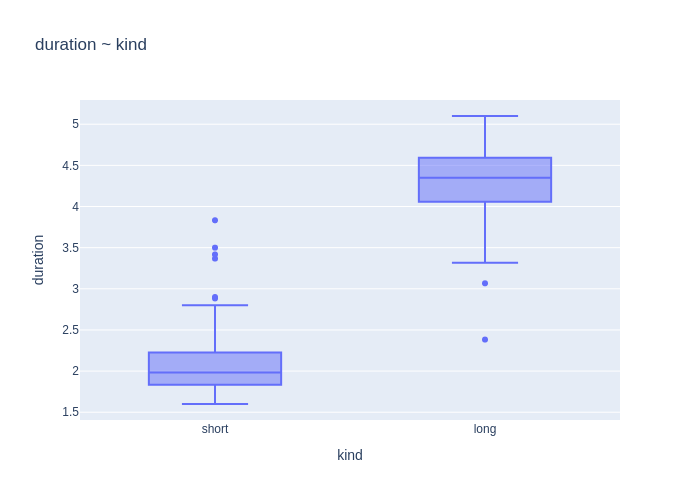

In [59]:
from IPython.display import display

display(smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().summary().tables[1])

fig = px.box(old_faithful, x='kind', y='duration', 
             title='duration ~ kind',
             category_orders={'kind': ['short', 'long']})
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

In [45]:
print('Data for entire dataset:')
print(smf.ols('duration ~ waiting', data=old_faithful).fit().summary().tables[1])
print('Data for short wait:')
print(smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().summary().tables[1])
print('Data for long wait:')
print(smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().summary().tables[1])

Data for entire dataset:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -1.8740      0.160    -11.702      0.000      -2.189      -1.559
waiting        0.0756      0.002     34.089      0.000       0.071       0.080
Data for short wait:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      1.6401      0.309      5.306      0.000       1.025       2.255
waiting        0.0069      0.006      1.188      0.238      -0.005       0.019
Data for long wait:
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      3.3520      0.476      7.049      0.000       2.413       4.291
waiting        0.0122      0.006      2.091      0.038       0.00

|p-value|Evidence|
|-|-|
|$$p > 0.1$$|No evidence against the null hypothesis|
|$$0.1 \ge p > 0.05$$|Weak evidence against the null hypothesis|
|$$0.05 \ge p > 0.01$$|Moderate evidence against the null hypothesis|
|$$0.01 \ge p > 0.001$$|Strong evidence against the null hypothesis|
|$$0.001 \ge p$$|Very strong evidence against the null hypothesis|

In the three cases above, we can see three distinctly different coutcomes. For the entire dataset, we see that the indicator variable values gives us a p-value that is incredibly miniscule, so much so that it is displayed as a long list of zeros. This suggests very strong evidence against the null hypothesis and allows us to confidently reject the null hypothesis. For the short wait, however, the p-value becomes rather large by contrast and shows no evidence against the null hypothesis, which may suggest that the alternative hypothesis may be false. Lastly, for the long waits, we see moderate evidence against the null hypothesis which allows us to consider both the null hypothesis and the alternative hypothesis as possible, although the null hypothesis still seems unlikely.

### 12. Identify which of the histograms suggests the plausibility of the assumption that the distribution of error terms is normal for each of the models, and explain why the other three do not support this assumption.

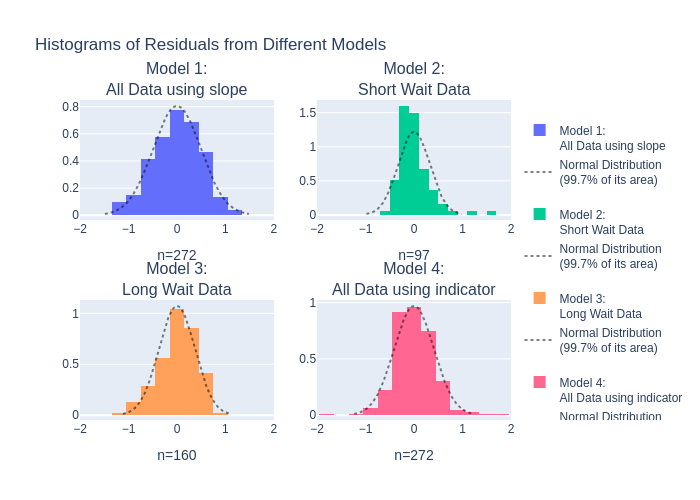

In [58]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go
from scipy import stats
import numpy as np

model_residuals = {
    '<br>Model 1:<br>All Data using slope': smf.ols('duration ~ waiting', data=old_faithful).fit().resid,
    '<br>Model 2:<br>Short Wait Data': smf.ols('duration ~ waiting', data=old_faithful[short_wait]).fit().resid,
    '<br>Model 3:<br>Long Wait Data': smf.ols('duration ~ waiting', data=old_faithful[long_wait]).fit().resid,
    '<br>Model 4:<br>All Data using indicator': smf.ols('duration ~ C(kind, Treatment(reference="short"))', data=old_faithful).fit().resid
}

fig = make_subplots(rows=2, cols=2, subplot_titles=list(model_residuals.keys()))
for i, (title, resid) in enumerate(model_residuals.items()):

    if i == 1:  # Apply different bins only to the second histogram (index 1)
        bin_size = dict(start=-1.9, end=1.9, size=0.2)
    else:
        bin_size = dict(start=-1.95, end=1.95, size=0.3)

    fig.add_trace(go.Histogram(x=resid, name=title, xbins=bin_size, histnorm='probability density'), 
                  row=int(i/2)+1, col=(i%2)+1)
    fig.update_xaxes(title_text="n="+str(len(resid)), row=int(i/2)+1, col=(i%2)+1)    
    
    normal_range = np.arange(-3*resid.std(),3*resid.std(),0.01)
    fig.add_trace(go.Scatter(x=normal_range, mode='lines', opacity=0.5,
                             y=stats.norm(loc=0, scale=resid.std()).pdf(normal_range),
                             line=dict(color='black', dash='dot', width=2),
                             name='Normal Distribution<br>(99.7% of its area)'), 
                  row=int(i/2)+1, col=(i%2)+1)
    
fig.update_layout(title_text='Histograms of Residuals from Different Models')
fig.update_xaxes(range=[-2,2])
fig.show(renderer='png') # USE `fig.show(renderer="png")` FOR ALL GitHub and MarkUs SUBMISSIONS

It seems that only the first model suggests the error terms to be normal, as it matches the normal distribution curve the best. In models 2 and 4, we see a right skew and in model 3 there is an apparent left skew which deviates the model from a normal distribution curve.

### 13. The "short" and "long" wait times are not "before and after" measurements so there are not natural pairs on which to base differences on which to do a "one sample" (paired differences) hypothesis test; but, we can do "two sample" hypothesis testing using a permuation test, or create a 95% bootstrap confidence interval for the difference in means of the two populations.

#### (A) Do a permuation test $\;H_0: \mu_{\text{short}}=\mu_{\text{long}} \; \text{ no difference in duration between short and long groups}$ by "shuffling" the labels
#### (B) Create a 95% bootstrap confidence interval  by repeatedly bootstrapping within each group and applying *np.quantile(bootstrapped_mean_differences, [0.025, 0.975])* to the collection of differences between the sample means.    
#### (a) Explain how the sampling approaches work for the two simulations.
#### (b) Compare and contrast these two methods with the *indicator variable* based model approach used in Question 11, explaining how they're similar and different.<br>

In [47]:
import numpy as np
import pandas as pd
import statsmodels.formula.api as smf
import plotly.express as px

# Load Old Faithful dataset
old_faithful = sns.load_dataset('geyser')

# Define the long waiting limit and create groups
long_wait_limit = 71
long_wait = old_faithful.waiting > long_wait_limit
short_wait = ~long_wait  # Short waiting time is the complement of long waiting

# (A) Permutation Test: H0: mu_short = mu_long (no difference between groups)
# Observed difference in means
obs_diff = old_faithful[long_wait].duration.mean() - old_faithful[short_wait].duration.mean()

# Number of permutations
n_permutations = 10000
perm_diffs = []

# Perform permutation test
combined_data = old_faithful[['duration', 'waiting']].copy()
combined_data['group'] = np.where(long_wait, 'long', 'short')

for _ in range(n_permutations):
    # Shuffle the group labels
    shuffled_groups = np.random.permutation(combined_data['group'])
    combined_data['shuffled_group'] = shuffled_groups
    
    # Calculate the mean difference between shuffled groups
    mean_diff = combined_data[combined_data['shuffled_group'] == 'long']['duration'].mean() - \
                combined_data[combined_data['shuffled_group'] == 'short']['duration'].mean()
    perm_diffs.append(mean_diff)

# Calculate the p-value
p_value = np.mean(np.abs(perm_diffs) >= np.abs(obs_diff))
print(f"Permutation test p-value: {p_value}")

# (B) 95% Bootstrap Confidence Interval
n_bootstrap_samples = 10000
bootstrapped_mean_differences = []

# Perform bootstrapping
for _ in range(n_bootstrap_samples):
    # Bootstrap sample for short and long waiting groups
    short_sample = np.random.choice(old_faithful[short_wait].duration, size=len(old_faithful[short_wait]), replace=True)
    long_sample = np.random.choice(old_faithful[long_wait].duration, size=len(old_faithful[long_wait]), replace=True)
    
    # Calculate the mean difference for the bootstrap sample
    bootstrapped_diff = long_sample.mean() - short_sample.mean()
    bootstrapped_mean_differences.append(bootstrapped_diff)

# Calculate the 95% confidence interval
conf_interval = np.quantile(bootstrapped_mean_differences, [0.025, 0.975])
print(f"Bootstrap 95% Confidence Interval: {conf_interval}")


Permutation test p-value: 0.0
Bootstrap 95% Confidence Interval: [1.94451857 2.20819011]


Without depending on rigid parametric assumptions, the bootstrap method and the permutation test are two resampling strategies that aid in our understanding of data variability. By creating "fake" datasets by randomly rearranging the group labels (such as long vs. short waiting), we can test the null hypothesis using the permutation test. We then compute the difference in means for each reshuffled version and compare the observed difference to the distribution of shuffled differences to obtain a p-value. In contrast, the bootstrap technique creates fresh "bootstrap" samples by repeatedly sampling with replacement from the data, computing the mean difference for each sample, and estimating a confidence interval based on the distribution of these differences. Both methods use repeated sampling to evaluate uncertainty or determine significance (permutation test).

Without making significant assumptions about the data, the flexible, non-parametric permutation and bootstrap procedures are helpful for estimating confidence intervals and testing hypotheses.
Though they make more stringent assumptions about the distribution and relationships of the data, indicator variable-based models (like linear regression) assume a parametric relationship and concentrate on estimating particular effects (like group differences or regression coefficients) and their significance.Without making significant assumptions about the data, the flexible, non-parametric permutation and bootstrap procedures are helpful for estimating confidence intervals and testing hypotheses.
Though they make more stringent assumptions about the distribution and relationships of the data, indicator variable-based models (like linear regression) assume a parametric relationship and concentrate on estimating particular effects (like group differences or regression coefficients) and their significance.

### 14. Have you reviewed the course wiki-textbook and interacted with a ChatBot (or, if that wasn't sufficient, real people in the course piazza discussion board or TA office hours) to help you understand all the material in the tutorial and lecture that you didn't quite follow when you first saw it?

Yes.